steps for windows:
    
1. install python 3.7.6 version (recommended)
https://www.python.org/downloads/release/python-376/
install Windows x86-64 executable installer
    
2. execute this command in command prompt

pip install --upgrade pip

pip install https://storage.googleapis.com/tensorflow/windows/cpu/tensorflow_cpu-2.2.0-cp37-cp37m-win_amd64.whl


In [ ]:
#tensorflow installation
# Requires the latest pip
#pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow


In [2]:
pip install tensorflow==2.0

  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7547 sha256=f917a8b8bd3f513cf402c3d1d2471a1e65605740a874d85d64217b23d319b4f4
  Stored in directory: c:\users\kanna\appdata\local\pip\cache\wheels\21\7f\02\420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorflow
    Found existing ins

In [1]:
import tensorflow

In [75]:
#importing tensorflow with alias tf
import tensorflow as tf

In [3]:
#tensorflow version
tf.__version__

'2.0.0'

## MNIST classification dataset

In [10]:
#Loading dataset 
mnist = tf.keras.datasets.mnist

In [12]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [13]:
mnist

<module 'tensorflow_core.keras.datasets.mnist' from 'C:\\Users\\kanna\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [14]:
x_train, x_test = x_train / 255.0 , x_test / 255.0

In [15]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="relu")
])

In [20]:
#to get model structure
#param = imput layer1 * layer 2 (weight) + layer2 (bias)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


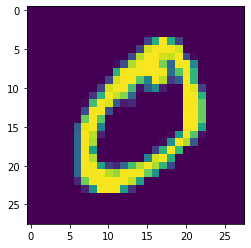

In [27]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [29]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.13956743, 0.        , 0.02081596, 0.        , 0.        ,
        0.        , 0.1550869 , 0.1071187 , 0.        , 0.        ]],
      dtype=float32)

In [30]:
tf.nn.softmax(predictions).numpy()

array([[0.11000922, 0.0956788 , 0.09769132, 0.0956788 , 0.0956788 ,
        0.0956788 , 0.11172982, 0.10649686, 0.0956788 , 0.0956788 ]],
      dtype=float32)

In [31]:
loss_func = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [38]:
loss_func(y_train[:1], predictions).numpy()

2.3467586

In [40]:
model.compile(
loss = loss_func,
optimizer= "adam",
metrics = ["accuracy"]
)

In [41]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.3416 - accuracy: 0.8979
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1433 - accuracy: 0.9583
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1092 - accuracy: 0.9665
Epoch 4/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0891 - accuracy: 0.9729
Epoch 5/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0749 - accuracy: 0.9772
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0641 - accuracy: 0.9801
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0594 - accuracy: 0.9806
Epoch 8/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.0519 - accuracy: 0.9833
Epoch 9/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0489 - accuracy: 0.9836
E

In [42]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0404 - accuracy: 0.9784


[0.08049609440219356, 0.9784]

## IRIS Classification using tensorflow

In [148]:
import seaborn as sns

In [149]:
iris = sns.load_dataset("iris")

In [150]:
iris["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [151]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [152]:
for cols in iris.columns:
    if cols != "species":
        iris[cols] = iris[cols] / max(iris[cols])

In [153]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.645570,0.795455,0.202899,0.08,setosa
1,0.620253,0.681818,0.202899,0.08,setosa
2,0.594937,0.727273,0.188406,0.08,setosa
3,0.582278,0.704545,0.217391,0.08,setosa
4,0.632911,0.818182,0.202899,0.08,setosa
...,...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92,virginica
146,0.797468,0.568182,0.724638,0.76,virginica
147,0.822785,0.681818,0.753623,0.80,virginica
148,0.784810,0.772727,0.782609,0.92,virginica


In [154]:
iris["species"] = iris["species"].map({"versicolor":0,"setosa":1,"virginica":2})

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
x = iris.iloc[:,0:4]
y = iris.iloc[:,4]

In [157]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08
...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92
146,0.797468,0.568182,0.724638,0.76
147,0.822785,0.681818,0.753623,0.80
148,0.784810,0.772727,0.782609,0.92


In [185]:
x_train,x_test,y_train, y_test =  train_test_split(x , y , train_size = 0.7, random_state =12)

In [186]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(4,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])

In [187]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_58 (Dense)             (None, 3)                 51        
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________


In [188]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [189]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [190]:
model.fit(x_train,y_train, epochs=30)

Train on 105 samples
Epoch 1/30
105/105 [==============================] - 1s 10ms/sample - loss: 1.0391 - accuracy: 0.3238
Epoch 2/30
105/105 [==============================] - 0s 381us/sample - loss: 1.0026 - accuracy: 0.3714
Epoch 3/30
105/105 [==============================] - 0s 276us/sample - loss: 0.9750 - accuracy: 0.3810
Epoch 4/30
105/105 [==============================] - 0s 276us/sample - loss: 0.9544 - accuracy: 0.3714
Epoch 5/30
105/105 [==============================] - 0s 267us/sample - loss: 0.9304 - accuracy: 0.3714
Epoch 6/30
105/105 [==============================] - 0s 287us/sample - loss: 0.9047 - accuracy: 0.3714
Epoch 7/30
105/105 [==============================] - 0s 265us/sample - loss: 0.8780 - accuracy: 0.3714
Epoch 8/30
105/105 [==============================] - 0s 267us/sample - loss: 0.8525 - accuracy: 0.3810
Epoch 9/30
105/105 [==============================] - 0s 277us/sample - loss: 0.8297 - accuracy: 0.3714
Epoch 10/30
105/105 [=======================

In [163]:
#https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

## Bank note authentication using tensorflow

In [111]:
import pandas as pd

df = pd.read_csv("datasets_84803_196262_BankNote_Authentication.csv")

In [112]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [113]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [114]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [115]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [116]:
for cols in x:
    x[cols] = x[cols]/max(x[cols])

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=78)

In [118]:
#why transform not for test ?
#x_train = minmax.fit_transform(x_train)
#x_test = minmax.fit(x_test)

In [119]:
x_train

,variance,skewness,curtosis,entropy
791,-0.656122,0.569103,-0.017414,-2.766034
68,0.146656,0.601053,-0.015741,-1.086263
1045,-0.002184,-0.079087,-0.052447,0.265177
504,0.414620,0.490171,-0.041024,-0.239498
1009,-0.523283,-0.964529,0.830466,-0.191986
...,...,...,...,...
310,0.589248,-0.208499,0.139211,0.149565
105,0.519253,0.095702,0.111394,0.879649
40,0.611168,0.673430,-0.168591,-0.243719
470,0.127851,0.717525,-0.043749,-0.897244


In [120]:
x_test

,variance,skewness,curtosis,entropy
383,0.558507,0.783355,-0.225705,-1.862788
1012,-0.332273,0.254517,-0.125858,-1.006001
635,0.277913,-0.194285,0.156704,-0.325544
159,0.198775,0.327048,0.119041,0.131088
626,0.269371,0.468127,0.030525,0.209218
...,...,...,...,...
753,0.462153,-0.399263,0.368101,0.234558
580,0.689720,0.640515,-0.142826,-0.608492
410,0.284404,0.035788,0.259223,0.444131
941,-0.253180,-0.528197,0.499202,0.277844


In [121]:
model = tf.keras.models.Sequential()

In [122]:
model.add(tf.keras.layers.Dense(64,activation="relu", input_shape=(4,)))

In [123]:
model.add(tf.keras.layers.Dense(32,activation="relu"))

In [124]:
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [125]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [126]:
type(x_train)

pandas.core.frame.DataFrame

In [127]:
#model.fit(x_train,y_train, epochs=10, verbose=2)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=2, epochs=10)

Train on 1097 samples, validate on 275 samples
Epoch 1/10
1097/1097 - 0s - loss: 0.6102 - accuracy: 0.7767 - val_loss: 0.5011 - val_accuracy: 0.9018
Epoch 2/10
1097/1097 - 0s - loss: 0.4373 - accuracy: 0.8624 - val_loss: 0.3077 - val_accuracy: 0.9200
Epoch 3/10
1097/1097 - 0s - loss: 0.2883 - accuracy: 0.8952 - val_loss: 0.1784 - val_accuracy: 0.9636
Epoch 4/10
1097/1097 - 0s - loss: 0.1881 - accuracy: 0.9398 - val_loss: 0.1092 - val_accuracy: 0.9709
Epoch 5/10
1097/1097 - 0s - loss: 0.1224 - accuracy: 0.9644 - val_loss: 0.0693 - val_accuracy: 0.9855
Epoch 6/10
1097/1097 - 0s - loss: 0.0821 - accuracy: 0.9772 - val_loss: 0.0459 - val_accuracy: 0.9964
Epoch 7/10
1097/1097 - 0s - loss: 0.0590 - accuracy: 0.9854 - val_loss: 0.0331 - val_accuracy: 0.9964
Epoch 8/10
1097/1097 - 0s - loss: 0.0443 - accuracy: 0.9918 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 9/10
1097/1097 - 0s - loss: 0.0362 - accuracy: 0.9982 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 10/10
1097/1097 - 0s - loss: 

In [130]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [134]:
history.history

{'loss': [0.6101751828476203,
  0.4372745642036118,
  0.28832882269198173,
  0.18809980827781864,
  0.12243922054428019,
  0.08211349617815496,
  0.05903546825907072,
  0.044314295528906526,
  0.03623096761527177,
  0.02866316641406678],
 'accuracy': [0.7766636,
  0.8623519,
  0.89516866,
  0.9398359,
  0.9644485,
  0.9772106,
  0.98541474,
  0.9917958,
  0.9981769,
  1.0],
 'val_loss': [0.5010991341417486,
  0.30766511115160855,
  0.17839842742139642,
  0.1091924299435182,
  0.06931644814935597,
  0.04590909397060221,
  0.03313943442295898,
  0.02538402285765518,
  0.01964552799409086,
  0.015982460213655774],
 'val_accuracy': [0.90181816,
  0.92,
  0.96363634,
  0.9709091,
  0.98545456,
  0.99636364,
  0.99636364,
  1.0,
  1.0,
  1.0]}

In [135]:
import matplotlib.pyplot as plt

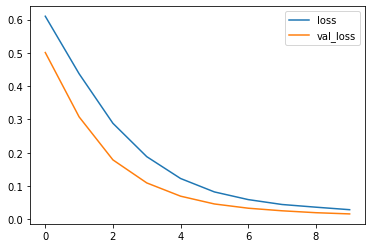

In [141]:
#Loss vs Validation loss

plt.plot(history.history["loss"])

plt.plot(history.history["val_loss"])

plt.legend(["loss", "val_loss"])
plt.show()

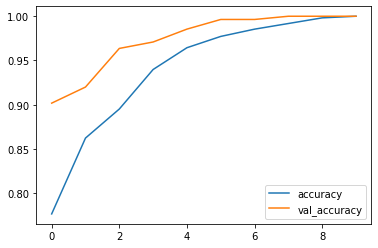

In [142]:
#accuracy vs validation accuracy

plt.plot(history.history["accuracy"])

plt.plot(history.history["val_accuracy"])

plt.legend(["accuracy", "val_accuracy"])
plt.show()

In [128]:
#tasks:

#week1 week2 videos
#